In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv('C:\\Git\\a3-predicting-car-price-Arun-vEDU\\Cars.csv')

In [3]:
#Step 1: Prepare data
# y is simply the selling price colomn
y = df["selling_price"]

# Covert into log scale
y_log = np.log(df["selling_price"])


# Using pd.cut to bin data into 4 classes
binned_data = pd.cut(y_log , bins=4) #now our y is four classes thus require multinomial


print(binned_data)

0       (11.761, 13.214]
1       (11.761, 13.214]
2       (11.761, 13.214]
3       (11.761, 13.214]
4       (11.761, 13.214]
              ...       
8123    (11.761, 13.214]
8124    (11.761, 13.214]
8125    (11.761, 13.214]
8126    (11.761, 13.214]
8127    (11.761, 13.214]
Name: selling_price, Length: 8128, dtype: category
Categories (4, interval[float64, right]): [(10.303, 11.761] < (11.761, 13.214] < (13.214, 14.666] < (14.666, 16.118]]


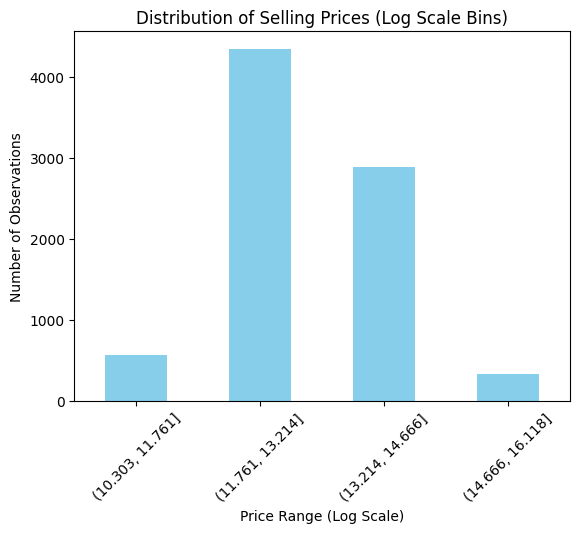

In [4]:
# plot the values
# Value counts for each bin
bin_counts = pd.value_counts(binned_data)

# Bar plot
bin_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Selling Prices (Log Scale Bins)')
plt.xlabel('Price Range (Log Scale)')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

class LogisticRegression:
    
    def __init__(self, k, n, method, alpha=0.01, max_iter=5000, use_penalty=False, penalty='ridge', lambda_=0.01):
        self.k = k  # Number of classes
        self.n = n  # Number of features
        self.alpha = alpha  # Learning rate
        self.max_iter = max_iter  # Maximum iterations
        self.method = method  # Optimization method: 'batch', 'minibatch', or 'sto'
        self.use_penalty = use_penalty  # Whether to use penalty (regularization)
        self.penalty = penalty  # Type of penalty ('ridge' for L2)
        self.lambda_ = lambda_  # Regularization strength
        self.W = np.random.rand(n + 1, k)  # Initialize weights

    def fit(self, X, Y):
        self.W = np.random.rand(self.n + 1, self.k)   # Initialize weights
        self.losses = []  # To store loss values
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                indices = np.random.choice(X.shape[0], size=batch_size, replace=False)  # Randomly select indices for the batch
                batch_X = X[indices]
                batch_Y = Y[indices]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])  # Randomly select an index
                X_train = X[idx, :].reshape(1, -1)  # Reshape for a single sample
                Y_train = Y[idx].reshape(1, -1)  # Reshape for a single sample
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W -= self.alpha * grad  # Update weights
                if i % 500 == 0:
                    print(f"Loss at iteration {i}: {loss}")
            print(f"Time taken: {time.time() - start_time}")
        
        else:
            raise ValueError('Method must be one of the following: "batch", "minibatch", or "sto".')
        
    def gradient(self, X, Y):
        m = X.shape[0]  # Number of training examples
        h = self.h_theta(X, self.W)  # Hypothesis
        loss = -np.sum(Y * np.log(h)) / m  # Cross-entropy loss
        
        # Apply penalty if use_penalty is True
        if self.use_penalty and self.penalty == 'ridge':
            loss += (self.lambda_ / (2 * m)) * np.sum(np.square(self.W))  # Ridge penalty (L2)
        
        error = h - Y  # Error term
        grad = self.softmax_grad(X, error)
        
        # Apply gradient for penalty if use_penalty is True
        if self.use_penalty and self.penalty == 'ridge':
            grad += (self.lambda_ / m) * self.W  # Add Ridge gradient (L2)
        
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)) / np.sum(np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error / X.shape[0]


    
    def h_theta(self, X, W):
        #print(f"X shape: {X.shape}")
        #print(f"W shape: {W.shape}")
        return self.softmax(X @ W)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses over iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    
    def accuracy(self, y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        total = len(y_true)
        return correct / total

    def precision(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FP = np.sum((y_true != class_label) & (y_pred == class_label))
        return TP / (TP + FP) if (TP + FP) > 0 else 0

    def recall(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FN = np.sum((y_true == class_label) & (y_pred != class_label))
        return TP / (TP + FN) if (TP + FN) > 0 else 0

    def f1_score(self, y_true, y_pred, class_label):
        prec = self.precision(y_true, y_pred, class_label)
        rec = self.recall(y_true, y_pred, class_label)
        return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    
    # New macro precision, recall, and f1 functions
    def macro_precision(self, y_true, y_pred):
        classes = np.unique(y_true)
        precision_scores = [self.precision(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(precision_scores)

    def macro_recall(self, y_true, y_pred):
        classes = np.unique(y_true)
        recall_scores = [self.recall(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(recall_scores)

    def macro_f1(self, y_true, y_pred):
        classes = np.unique(y_true)
        f1_scores = [self.f1_score(y_true, y_pred, class_label) for class_label in classes]
        return np.mean(f1_scores)
    
    def weighted_recall(self, class_labels, weights, recalls):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
            weighted_sum += weight * recalls[class_label]  # Multiply recall by weight
        return weighted_sum / sum(weights)

    def weighted_precision(self, class_labels, weights, precisions):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
            weighted_sum += weight * precisions[class_label]  # Multiply precision by weight
        return weighted_sum / sum(weights)
    
    def weighted_f1(self, class_labels, weights, precisions, recalls):
        weighted_sum = 0
        for i in range(len(class_labels)):  # Iterate based on index
            class_label = class_labels[i]  # Get class label at index i
            weight = weights[i]  # Get weight at index i
        
            # Calculate the F1 score for the current class
            if precisions[class_label] + recalls[class_label] > 0:  # Prevent division by zero
                f1_score = 2 * (precisions[class_label] * recalls[class_label]) / (precisions[class_label] + recalls[class_label])
            else:
                f1_score = 0  # Assign 0 if both precision and recall are 0

            weighted_sum += weight * f1_score  # Multiply F1 score by weight
        return weighted_sum / sum(weights)


In [7]:
import os
import mlflow
# Set the environment variables for MLflow authentication
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

# Set the MLflow tracking URI to the CSIM MLflow server
mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th")

# Create an experiment
mlflow.set_experiment("st125159-a3")

<Experiment: artifact_location='mlflow-artifacts:/349075529584389172', creation_time=1728134083048, experiment_id='349075529584389172', last_update_time=1728134083048, lifecycle_stage='active', name='st125159-a3', tags={}>

In [8]:
# Step 1: Prepare data 
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

# Split data into training and test datasets
idx = np.arange(0, len(X), 1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7 * len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

# One-hot encoding the labels (unchanged)
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

Y_train_encoded = one_hot_encode(y_train, len(set(y)))

# Parameter grid
penalties = ['l1', 'l2']
lambdas = [0.1, 0.01, 0.001]
methods = ['batch', 'minibatch', 'sto']

best_accuracy = 0
best_run_details = None

# Iterate over different combinations
for penalty in penalties:
    for lambda_ in lambdas:
        for method in methods:
            with mlflow.start_run():
                # Log parameters (penalty, lambda, method)
                mlflow.log_param("penalty", penalty)
                mlflow.log_param("lambda", lambda_)
                mlflow.log_param("method", method)

                # Assuming LogisticRegression is your custom class
                log_reg_ridge = LogisticRegression(k=len(set(y)), n=X_train.shape[1] - 1,
                                                   method=method, use_penalty=True, 
                                                   penalty=penalty, lambda_=lambda_)
                log_reg_ridge.fit(X_train, Y_train_encoded)

                # Predict and calculate metrics
                y_pred = log_reg_ridge.predict(X_test)
                accuracy = log_reg_ridge.accuracy(y_test, y_pred)
                macro_precision = log_reg_ridge.macro_precision(y_test, y_pred)
                macro_recall = log_reg_ridge.macro_recall(y_test, y_pred)
                macro_f1 = log_reg_ridge.macro_f1(y_test, y_pred)

                # Log metrics
                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("macro_precision", macro_precision)
                mlflow.log_metric("macro_recall", macro_recall)
                mlflow.log_metric("macro_f1_score", macro_f1)

                # Save the model (without logging the dataset)
                mlflow.sklearn.log_model(log_reg_ridge, f"st125159-a3-model")

                # Track the best model
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_run_details = {
                        'penalty': penalty,
                        'lambda': lambda_,
                        'method': method,
                        'accuracy': accuracy
                    }

                mlflow.end_run()

# Log the best model in a separate run (similar to previous)
if best_run_details:
    with mlflow.start_run(run_name="Best Model Run"):
        mlflow.log_param("best_penalty", best_run_details['penalty'])
        mlflow.log_param("best_lambda", best_run_details['lambda'])
        mlflow.log_param("best_method", best_run_details['method'])
        mlflow.log_metric("best_accuracy", best_run_details['accuracy'])

    print("Best Model Details:", best_run_details)

Loss at iteration 0: 1.306402714182165
Loss at iteration 500: 0.4722036772433328
Loss at iteration 1000: 0.37625823706366235
Loss at iteration 1500: 0.3229368699887448
Loss at iteration 2000: 0.2870693351726963
Loss at iteration 2500: 0.26096846049192546
Loss at iteration 3000: 0.24103923660414242
Loss at iteration 3500: 0.22529432994130852
Loss at iteration 4000: 0.21252664117789424
Loss at iteration 4500: 0.2019555617147584
Time taken: 0.18938469886779785


2024/10/05 22:38:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:38:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run burly-shrew-438 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/6cd609713a944e00b88b860fa38249e6.
2024/10/05 22:38:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.228685622214562
Loss at iteration 500: 0.468058490573489
Loss at iteration 1000: 0.4081558739981187
Loss at iteration 1500: 0.3674787427576329
Loss at iteration 2000: 0.28576910977924014
Loss at iteration 2500: 0.20778957618189212
Loss at iteration 3000: 0.20231775888949735
Loss at iteration 3500: 0.23309916429879746
Loss at iteration 4000: 0.24958896479509582
Loss at iteration 4500: 0.14535298515369094
Time taken: 0.23113322257995605


2024/10/05 22:38:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:38:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run illustrious-fox-173 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/6e0e1662c9a34e848abf561aab82d7d4.
2024/10/05 22:38:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.260648606746902
Loss at iteration 500: 0.10409914096115393
Loss at iteration 1000: 0.45224745473612116
Loss at iteration 1500: 0.04605000520314237
Loss at iteration 2000: 0.13025500100692447
Loss at iteration 2500: 0.04995694238482529
Loss at iteration 3000: 0.7903594367097505
Loss at iteration 3500: 0.10964326334684657
Loss at iteration 4000: 0.2591255193666388
Loss at iteration 4500: 0.044878446919790364
Time taken: 0.13309645652770996


2024/10/05 22:38:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:38:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run serious-horse-494 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/741895ffa5d64942953f8d7dc304cec8.
2024/10/05 22:38:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.9087452032269306
Loss at iteration 500: 0.4540154878141172
Loss at iteration 1000: 0.36754345353326134
Loss at iteration 1500: 0.3175766902629944
Loss at iteration 2000: 0.28353734555323407
Loss at iteration 2500: 0.2585679063001963
Loss at iteration 3000: 0.239386390000292
Loss at iteration 3500: 0.22415758414857642
Loss at iteration 4000: 0.21175783460303066
Loss at iteration 4500: 0.20145579263739888
Time taken: 0.20568299293518066


2024/10/05 22:38:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:38:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run youthful-bee-127 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/0989d1286bed4a56a7c959a9fc098035.
2024/10/05 22:38:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.3978154050547367
Loss at iteration 500: 0.5516662244665135
Loss at iteration 1000: 0.3906389624701357
Loss at iteration 1500: 0.3536389840657286
Loss at iteration 2000: 0.3281598631581904
Loss at iteration 2500: 0.24033736924215116
Loss at iteration 3000: 0.28260852206311365
Loss at iteration 3500: 0.17892828304631075
Loss at iteration 4000: 0.23896988615994616
Loss at iteration 4500: 0.2601371418019256
Time taken: 0.2604703903198242


2024/10/05 22:38:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:38:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run bittersweet-pug-919 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/76aa1eeb6be44c329fdb773cec045a72.
2024/10/05 22:38:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.8690225610044376
Loss at iteration 500: 0.15248455523288898
Loss at iteration 1000: 0.4182532028176776
Loss at iteration 1500: 0.0840250414422684
Loss at iteration 2000: 0.08518802941480826
Loss at iteration 2500: 0.2883486584433058
Loss at iteration 3000: 0.28318216525100137
Loss at iteration 3500: 0.05263742320639651
Loss at iteration 4000: 0.26476004809127096
Loss at iteration 4500: 0.24964965077554185
Time taken: 0.1617891788482666


2024/10/05 22:39:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-snipe-661 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/8d058e5b6211473baa433d50298dadd8.
2024/10/05 22:39:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.3881728260098545
Loss at iteration 500: 0.4733010256352413
Loss at iteration 1000: 0.37908271284322287
Loss at iteration 1500: 0.32601432848311535
Loss at iteration 2000: 0.2900534564513481
Loss at iteration 2500: 0.26377870912231083
Loss at iteration 3000: 0.24366652832296418
Loss at iteration 3500: 0.22775015091647355
Loss at iteration 4000: 0.2148275240245606
Loss at iteration 4500: 0.2041180297430125
Time taken: 0.23102307319641113


2024/10/05 22:39:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-lynx-477 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/5d953723b8f3429f8a8de887dead74bb.
2024/10/05 22:39:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.1716656349105066
Loss at iteration 500: 0.5455186359305779
Loss at iteration 1000: 0.4079925524696511
Loss at iteration 1500: 0.32800515250366075
Loss at iteration 2000: 0.2568442473975821
Loss at iteration 2500: 0.29674562624535133
Loss at iteration 3000: 0.2469085505525764
Loss at iteration 3500: 0.2860086937645989
Loss at iteration 4000: 0.24960382166742465
Loss at iteration 4500: 0.17996730515975554
Time taken: 0.3342883586883545


2024/10/05 22:39:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run powerful-gull-368 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/67c97898ef514dc9a62945c429940c3c.
2024/10/05 22:39:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.2441375458846076
Loss at iteration 500: 0.8333485598195747
Loss at iteration 1000: 0.09143285364387435
Loss at iteration 1500: 0.20003039955078342
Loss at iteration 2000: 0.03577126517292437
Loss at iteration 2500: 0.3259364921867583
Loss at iteration 3000: 0.32329238923542786
Loss at iteration 3500: 0.041000767105727094
Loss at iteration 4000: 0.16441522089530264
Loss at iteration 4500: 0.033490704154054626
Time taken: 0.13301897048950195


2024/10/05 22:39:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run adaptable-frog-716 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/f6da122ead594f5fb02668cb39b64368.
2024/10/05 22:39:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.1869875659890996
Loss at iteration 500: 0.47304975819486883
Loss at iteration 1000: 0.37991001355216
Loss at iteration 1500: 0.3264676199283369
Loss at iteration 2000: 0.29017178123258114
Loss at iteration 2500: 0.26366177111205646
Loss at iteration 3000: 0.24339106576635214
Loss at iteration 3500: 0.22736901016039252
Loss at iteration 4000: 0.21437640671809213
Loss at iteration 4500: 0.2036211517447414
Time taken: 0.22162604331970215


2024/10/05 22:39:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run crawling-ant-994 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/ec5d56ae03224b11b7c94328a1481d34.
2024/10/05 22:39:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.4630088651433686
Loss at iteration 500: 0.5404924352561911
Loss at iteration 1000: 0.3864711513216273
Loss at iteration 1500: 0.31840863331402924
Loss at iteration 2000: 0.2714246225509926
Loss at iteration 2500: 0.28735365289179315
Loss at iteration 3000: 0.30572358363519686
Loss at iteration 3500: 0.30594807351514214
Loss at iteration 4000: 0.21701494119181056
Loss at iteration 4500: 0.25331722485523445
Time taken: 0.27394771575927734


2024/10/05 22:39:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run suave-doe-126 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/34d605510f014667a315016a66da280c.
2024/10/05 22:39:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.370604050146512
Loss at iteration 500: 1.0559739272759316
Loss at iteration 1000: 0.8886415889534164
Loss at iteration 1500: 0.09137060555078562
Loss at iteration 2000: 0.3441898245122266
Loss at iteration 2500: 0.05221856533069476
Loss at iteration 3000: 0.8956242676309246
Loss at iteration 3500: 0.16232071911847568
Loss at iteration 4000: 0.26200886264650963
Loss at iteration 4500: 0.052301275118400756
Time taken: 0.15674448013305664


2024/10/05 22:39:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run delicate-ape-488 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/0d5958625bda4c8a911c3d661445494e.
2024/10/05 22:39:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.1625344667251274
Loss at iteration 500: 0.4935974792191998
Loss at iteration 1000: 0.39164142434185917
Loss at iteration 1500: 0.3343928864097522
Loss at iteration 2000: 0.29608697620260527
Loss at iteration 2500: 0.2683378587612522
Loss at iteration 3000: 0.24723013660992416
Loss at iteration 3500: 0.23060879471540835
Loss at iteration 4000: 0.21716905907010986
Loss at iteration 4500: 0.2060694774949625
Time taken: 0.2703375816345215


2024/10/05 22:39:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run masked-sloth-815 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/e9a0a970ba5b402ca82b6768f465c5ad.
2024/10/05 22:39:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.9899274121030937
Loss at iteration 500: 0.5218910595436653
Loss at iteration 1000: 0.34175639322344176
Loss at iteration 1500: 0.336879720998622
Loss at iteration 2000: 0.24646737656253087
Loss at iteration 2500: 0.2059523431616645
Loss at iteration 3000: 0.2008544008010725
Loss at iteration 3500: 0.2731016799397635
Loss at iteration 4000: 0.20541230406369151
Loss at iteration 4500: 0.1363938947429342
Time taken: 0.2990119457244873


2024/10/05 22:39:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run worried-skink-5 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/ee5441e8f65c4b419185e6d6dfdb971e.
2024/10/05 22:39:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.3500444480264837
Loss at iteration 500: 0.8620247774168627
Loss at iteration 1000: 0.09391532255708364
Loss at iteration 1500: 0.6659914657893181
Loss at iteration 2000: 0.12905325345360685
Loss at iteration 2500: 0.3485425090773996
Loss at iteration 3000: 0.11666016474681327
Loss at iteration 3500: 0.1060493712458303
Loss at iteration 4000: 0.19240244376279805
Loss at iteration 4500: 0.12444055722992899
Time taken: 0.1419541835784912


2024/10/05 22:39:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:39:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run funny-shrew-395 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/6c98d2e2318c4e81a6f7f4544b80411b.
2024/10/05 22:39:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.078487792583152
Loss at iteration 500: 0.44077370897625107
Loss at iteration 1000: 0.3587870685954978
Loss at iteration 1500: 0.31181424743390923
Loss at iteration 2000: 0.2795919818227141
Loss at iteration 2500: 0.25579708627767866
Loss at iteration 3000: 0.2374120033007888
Loss at iteration 3500: 0.22274259247642167
Loss at iteration 4000: 0.21074662271261496
Loss at iteration 4500: 0.20074249606626648
Time taken: 0.21865367889404297


2024/10/05 22:40:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:40:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run dapper-slug-942 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/7a098602afce49f5aae42cf585145c48.
2024/10/05 22:40:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 0.5928333856229288
Loss at iteration 500: 0.37715553305995836
Loss at iteration 1000: 0.2950708364868105
Loss at iteration 1500: 0.3142097603511724
Loss at iteration 2000: 0.2730692051150717
Loss at iteration 2500: 0.2594801437778283
Loss at iteration 3000: 0.33973677403324215
Loss at iteration 3500: 0.2079866922500046
Loss at iteration 4000: 0.24058093226616745
Loss at iteration 4500: 0.1901577700076183
Time taken: 0.2498791217803955


2024/10/05 22:40:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:40:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run marvelous-shark-703 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/8a23c51b8021422ba044e610875c807d.
2024/10/05 22:40:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Loss at iteration 0: 1.3035676518317736
Loss at iteration 500: 0.1537978544668169
Loss at iteration 1000: 0.05667883516906575
Loss at iteration 1500: 0.06455383614359671
Loss at iteration 2000: 0.049778570139518565
Loss at iteration 2500: 0.04303468078568405
Loss at iteration 3000: 0.32426284178458853
Loss at iteration 3500: 0.068031453234445
Loss at iteration 4000: 0.05838168515104274
Loss at iteration 4500: 0.060766209752649944
Time taken: 0.13914132118225098


2024/10/05 22:40:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/05 22:40:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run angry-goat-34 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/0e133429ab834ed08bceeff518e03387.
2024/10/05 22:40:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.
2024/10/05 22:40:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Best Model Run at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172/runs/6371aad11a5b4bfa9f51e9a56f621454.
2024/10/05 22:40:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/349075529584389172.


Best Model Details: {'penalty': 'l1', 'lambda': 0.1, 'method': 'batch', 'accuracy': np.float64(0.9777777777777777)}


In [9]:
# Register the best model
model_name = f"st125159-a3-model"

# Get the latest run ID (the best one)
best_run_id = mlflow.active_run().info.run_id  # This should be the best run ID

# Register the model in the Model Registry
model_uri = f"runs:/{best_run_id}/st125159-a3-model"
mlflow.register_model(model_uri=model_uri, name=model_name)

# Transition the model to 'staging'
from mlflow.tracking import MlflowClient

client = MlflowClient()
latest_version = client.get_latest_versions(model_name, stages=["None"])[0].version
client.transition_model_version_stage(
    name=model_name,
    version=latest_version,
    stage="Staging"
)

print(f"Model {model_name} version {latest_version} transitioned to Staging.")

AttributeError: 'NoneType' object has no attribute 'info'